<a href="https://colab.research.google.com/github/vantainguyen/A-B-Testing/blob/main/Power_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Power analysis for T test

## Computing the sample sizes

In [ ]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestPower
# parameter for power analysis
effect = .8
alpha = .05
power = .9
# perform power analysis
analysis = TTestPower()
result = analysis.solve_power(effect, power = power, nobs=None, alpha=alpha)
print('Sample size required is: %.3f' % result)

Sample size required is: 18.446


## Analysing power for different cases

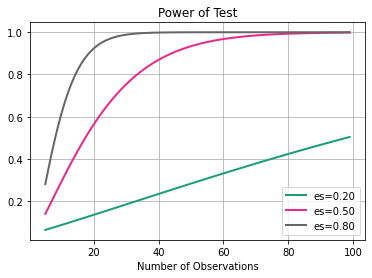

In [ ]:
# Calculate power curve for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestPower

analysis = TTestPower()

# parameter for power analysis
effect_sizes = array([.2, .5, .8])
sample_sizes = array(range(5, 100))
# Calculate power curves from multiple power analyses
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alternative='larger') 
pyplot.grid()
pyplot.show()


# Power analysis for Z test

## Computing sample sizes

In [ ]:
# estimate sample size via power analysis
from statsmodels.stats.power import NormalIndPower
# parameter for power analysis
effect = .2
alpha = .02
power = .9
# perform power analysis
analysis = NormalIndPower()
result = analysis.solve_power(effect, power = power, nobs1=None, alpha=alpha, ratio=0, alternative='larger') # ratio set to zero to indicate one sample normal test
print('Sample size required is: %.3f' % result)

Sample size required is: 10.000


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/power.py:93: RuntimeWarning: invalid value encountered in sqrt
  pow_ += stats.norm.cdf(crit - d*np.sqrt(nobs)/sigma)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/power.py:301: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


## Analysing power for different cases

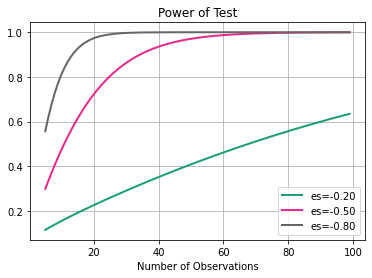

In [ ]:
# Calculate power curve for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import NormalIndPower

analysis = NormalIndPower()

# parameter for power analysis
effect_sizes = -array([.2, .5, .8])
sample_sizes = array(range(5, 100))
# Calculate power curves from multiple power analyses
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, ratio=0, alternative='larger') 
pyplot.grid()
pyplot.show()


# One sample T - Test

In [ ]:
# Given the thresold condition for the average of the R-squared metrics for the predicted results: mu0
# This test aims to show whether there is a sufficient evidence that the average of the R-squared (mu) of the predictions greater than mu0
# In order to perform this test, N iid samples (N <= 30) are taken from the prediction population
# Null hypothesis H0: mu <= mu0
# Alternative hypothesis Ha: mu > mu0  ----> right tailed test

## Self-determined procedure

In [21]:
import numpy as np
from scipy.stats import t

N = 30
pred = [(np.random.randn()*0.1 + 0.85) for i in np.arange(N)]
mu0 = 0.8

std = np.std(pred, ddof=1)
mu = np.mean(pred)

t_stat = (mu - mu0)/(std/np.sqrt(N))


p_value = t.sf(t_stat, df=N-1)

t_stat, p_value, N - 1

print('tstat p_value:', t_stat, p_value)

if p_value < 0.05:
  print('Reject null hypothesis (p_value = %.3f); there is sufficient evidence to conclude that mean R-squared of the predicted results > %.3f' %(p_value, mu0))
else:
  print('Fail to reject null hypothesis')



tstat p_value: 2.0950950560464094 0.022504127491529843
Reject null hypothesis (p_value = 0.023); there is sufficient evidence to conclude that mean R-squared of the predicted results > 0.800


## Using API

In [22]:
from statsmodels.stats.weightstats import DescrStatsW

Des_test = DescrStatsW(pred)

t_stat, p_value, df = Des_test.ttest_mean(mu0, alternative='larger')

t_stat, p_value, df

print('tstat p_value:', t_stat, p_value)

if p_value < 0.05:
  print('Reject null hypothesis (p_value = %.3f); there is sufficient evidence to conclude that mean R-squared of the predicted results > %.3f' %(p_value, mu0))
else:
  print('Fail to reject null hypothesis')


tstat p_value: 2.0950950560464094 0.022504127491529843
Reject null hypothesis (p_value = 0.023); there is sufficient evidence to conclude that mean R-squared of the predicted results > 0.800


# One sample Z - Test

In [9]:
# Given the thresold condition for the average of the R-squared metrics for the predicted results: mu0
# This test aims to show whether there is a sufficient evidence that the average of the R-squared (mu) of the predictions greater than mu0
# In order to perform this test, N iid samples (N > 30) are taken from the prediction population
# Null hypothesis H0: mu <= mu0
# Alternative hypothesis Ha: mu > mu0  ----> right tailed test

## Self-determined procedure

In [35]:
import numpy as np
from scipy.stats import norm

N = 60
pred = [(np.random.randn()*0.1 + 0.85) for i in np.arange(N)]
mu0 = 0.8

std = np.std(pred, ddof=1)
mu = np.mean(pred)

z_stat = (mu - mu0)/(std/np.sqrt(N))


p_value = norm.sf(z_stat)

z_stat, p_value

print('zstat p_value:', z_stat, p_value)

if p_value < 0.05:
  print('Reject null hypothesis (p_value = %.3f); there is sufficient evidence to conclude that mean R-squared of the predicted results > %.3f' %(p_value, mu0))
else:
  print('Fail to reject null hypothesis')

zstat p_value: 1.5310218729517668 0.06288199345304032
Fail to reject null hypothesis


## Using API

In [36]:
from statsmodels.stats.weightstats import DescrStatsW

Des_test = DescrStatsW(pred)

z_stat, p_value = Des_test.ztest_mean(mu0, alternative='larger')

print('zstat p_value:', z_stat, p_value)

if p_value < 0.05:
  print('Reject null hypothesis (p_value = %.3f); there is sufficient evidence to conclude that mean R-squared of the predicted results > %.3f' %(p_value, mu0))
else:
  print('Fail to reject null hypothesis')

zstat p_value: 1.5310218729517755 0.06288199345303923
Fail to reject null hypothesis


In [14]:
z_stat, p_value

(3.8476408900685715, 5.9630347120709194e-05)